<div style="text-align: center"> <h1>Project Report</h1></div>

***

<div style="text-align: center"> <h2>Predicting Occupation Using Knn-Classifciation</h2></div>

<h4> Introduction </h4>

A person's occupation has a significant impact on their lifestyle and health. Overall well-being can be influenced by a number of work-related factors, including physical demands, irregular hours, sedentary positions, and stress related to one's job. Maintaining a healthy balance between work obligations and personal well-being is essential for a long-lasting and satisfying career. The following suggestion is based on this awareness:

Our work is founded on the concept that different occupational categories may show certain patterns in health and wellness parameters, allowing one to infer a person's career from variables like stress and sleep habits.

Our research aims to determine whether it is possible to predict an individual's occupation using predictor variables from the dataset of interest. 

The Sleep Health and Lifestyle Dataset includes data on gender, age, occupation, sleep metrics, physical activity, stress levels, BMI, cardiovascular health, and sleep disorders. The dataset's columns consist of Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder Status (None, Insomnia, Sleep Apnea). This dataset facilitates in-depth analysis of sleep patterns, lifestyle factors, cardiovascular health, and sleep disorders for a diverse population.
The Hypothesis underlying our study is that distinct occupational categories may exhibit specific patterns in health and wellness factors, making it possible to infer a person's profession based on factors such as sleep and stress levels. 


In [7]:
library(repr)
library(tidyverse)
install.packages("janitor")
install.packages("kknn")
library(janitor)
library(ggplot2)
library(kknn)
library(tidymodels)


url  <- "https://raw.githubusercontent.com/hmza-exe/DSCI-100-GroupProject_003-12/main/Sleep_health_and_lifestyle_dataset.csv"
sleep_health_data <- read_csv(url) |> 
                        rename("person_id" = "Person ID",
                               "gender" = "Gender",
                               "age" = "Age", "occupation" = "Occupation",
                               "sleep_duration" = "Sleep Duration",
                               "quality_of_sleep" = "Quality of Sleep",
                               "physical_activity_level" = "Physical Activity Level",
                               "stress_level" = "Stress Level",
                               "bmi_category" = "BMI Category",
                               "blood_pressure" = "Blood Pressure",
                               "heart_rate" = "Heart Rate",
                               "daily_steps" = "Daily Steps",
                               "sleep_disorder" = "Sleep Disorder")|>
                        select(occupation, daily_steps, physical_activity_level, stress_level, quality_of_sleep, sleep_duration)
head(sleep_health_data)
tail(sleep_health_data)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Software Engineer,4200,42,6,6,6.1
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Sales Representative,3000,30,8,4,5.9
Sales Representative,3000,30,8,4,5.9
Software Engineer,3000,30,8,4,5.9


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.0
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1


In [8]:
sleep_health_data_scaled <- sleep_health_data |>
                        mutate(scaled_daily_steps = scale(daily_steps, center = TRUE),
                               scaled_physical_activity = scale(physical_activity_level, center = TRUE),
                                scaled_stress_level = scale(stress_level, center = TRUE),
                              scaled_quality_of_sleep = scale(quality_of_sleep, center = TRUE),
                              scaled_sleep_duration = scale(sleep_duration, center = TRUE))
head(sleep_health_data_scaled)
tail(sleep_health_data_scaled)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Software Engineer,4200,42,6,6,6.1,-1.617417,-0.82431400,0.3465563,-1.096811,-1.297149
Doctor,10000,60,8,6,6.2,1.967442,0.03979093,1.4736175,-1.096811,-1.171467
Doctor,10000,60,8,6,6.2,1.967442,0.03979093,1.4736175,-1.096811,-1.171467
Sales Representative,3000,30,8,4,5.9,-2.359112,-1.40038394,1.4736175,-2.767716,-1.548514
Sales Representative,3000,30,8,4,5.9,-2.359112,-1.40038394,1.4736175,-2.767716,-1.548514
Software Engineer,3000,30,8,4,5.9,-2.359112,-1.40038394,1.4736175,-2.767716,-1.548514


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.0,0.1132043,0.7598784,-1.344036,1.409547,1.090815
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498
Nurse,7000,75,3,9,8.1,0.1132043,0.7598784,-1.344036,1.409547,1.216498


In [9]:
sleep_health_data_split <- initial_split(sleep_health_data, prop = 0.75, strata = occupation)


sleep_train <- training(sleep_health_data_split)   
sleep_test <- testing(sleep_health_data_split)

head(sleep_train)
head(sleep_test)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8
Doctor,8000,30,8,6,6.1


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sales Representative,3000,30,8,4,5.9
Doctor,8000,75,6,7,7.8
Doctor,8000,30,8,6,6.1
Doctor,8000,30,8,6,6.0
Nurse,4000,40,7,5,6.5
Doctor,8000,75,6,7,7.6


! Fold1: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Sa...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 r...

! Fold2: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Ma...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 r...

! Fold3: internal:
  There were 8 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 2`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): 'Ma..

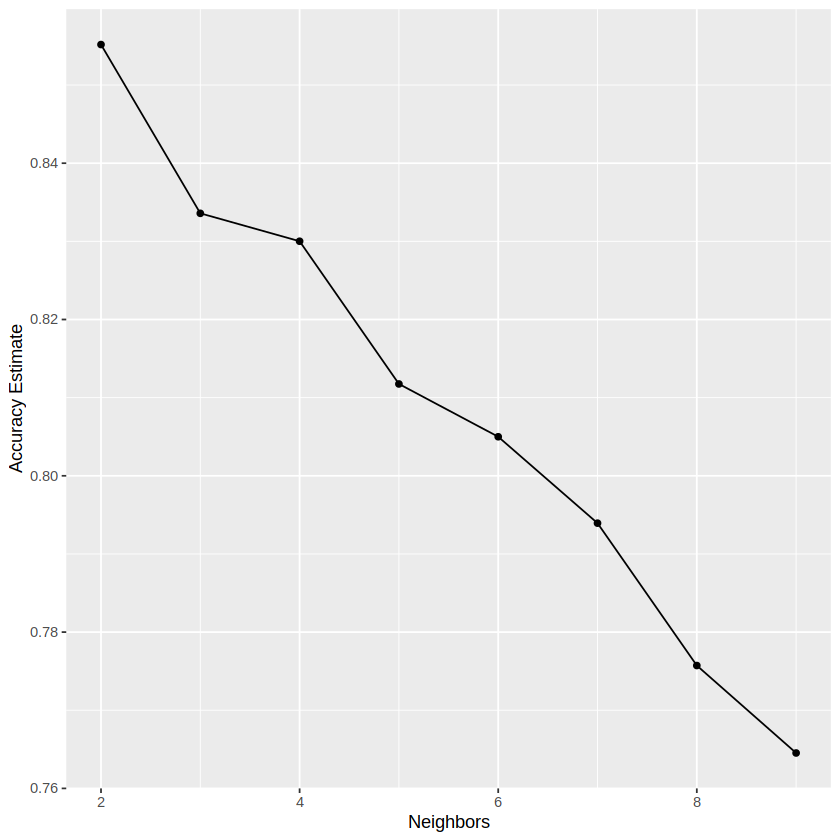

In [23]:
sleep_recipe <- recipe(occupation ~ ., data = sleep_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

sleep_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = occupation)
k_vals <- tibble(neighbors = seq(from = 2, to = 9))

sleep_results <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
tune_grid(resamples = sleep_vfold, grid = k_vals) |>
collect_metrics()

accuracy <- sleep_results |>
filter(.metric == "accuracy")

cross_val_plot <- accuracy |>
ggplot(aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate")

cross_val_plot 


In [16]:
k_vals <- tibble(neighbors = seq(from = 3, to = 7))

gridvals <- tibble(neighbors = seq(1, 200))

sleep_results <- sleep_wkflw |>
  tune_grid(resamples = sleep_vfold, grid = k_vals) |>
  collect_metrics() |>
filter(.metric == "rmse")


sleep_k <- sleep_wkflw |>
              pull(neighbors)


sleep_wkflw 


x Fold1: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a regression model, the outcome should be numeric.

x Fold2: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a regression model, the outcome should be numeric.

x Fold3: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a regression model, the outcome should be numeric.

x Fold4: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a regression model, the outcome should be numeric.

x Fold5: preprocessor 1/1, model 1/1:
  Error in `check_outcome()`:
  ! For a regression model, the outcome should be numeric.

Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more information.”


ERROR: [1m[33mError[39m in `estimate_tune_results()`:[22m
[33m![39m All of the models failed. See the .notes column.


<h4>Discussion</h4>

<h4>References</h4>

Tharmalingam, L. (2023, September 18). Sleep health and lifestyle dataset. Kaggle. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset 